Saved figures/gas_comparison.png and .svg


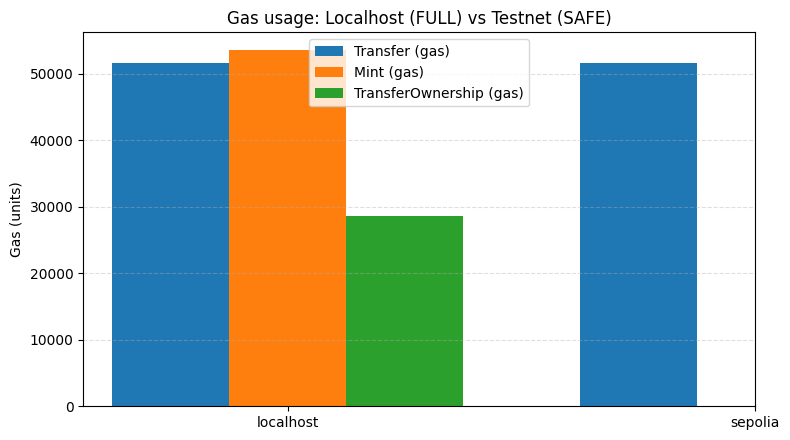

In [ ]:
# scripts/plot_gas_comparison.py
import pandas as pd
import matplotlib.pyplot as plt
import os

# Input CSV path (update if different)
csv_path = "reports/interaction_summary.csv"  # or "interaction_summary.csv"
out_dir = "figures"
os.makedirs(out_dir, exist_ok=True)

# Load CSV (it uses header: network,mode,transferGas,mintGas,ownershipGas,...)
df = pd.read_csv(csv_path)

# Normalize 'DISABLED' -> NaN for plotting numeric bars; keep a marker for disabled
def to_num(val):
    try:
        return float(val)
    except:
        return float("nan")

df['transferGas_n'] = df['transferGas'].apply(to_num)
df['mintGas_n'] = df['mintGas'].apply(to_num)
df['ownershipGas_n'] = df['ownershipGas'].apply(to_num)

# Create grouped bar chart for transfer / mint / ownership
labels = df['network'].tolist()
x = range(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8,4.5))
ax.bar([p - width for p in x], df['transferGas_n'], width=width, label='Transfer (gas)')
ax.bar(x, df['mintGas_n'], width=width, label='Mint (gas)')
ax.bar([p + width for p in x], df['ownershipGas_n'], width=width, label='TransferOwnership (gas)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Gas (units)')
ax.set_title('Gas usage: Localhost (FULL) vs Testnet (SAFE)')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig(os.path.join(out_dir, "gas_comparison.png"), dpi=300)
plt.savefig(os.path.join(out_dir, "gas_comparison.svg"))
print("Saved figures/gas_comparison.png and .svg")
